# inicializacao

In [85]:
import numpy as np
import pandas as pd
import sympy as sp
import scipy.io as sc 
import scipy.signal as signal
from sympy import symbols, pprint
import matplotlib.pyplot as plt
from structureSelector import *

from methods.utils.utilities import *
import plotly.express as px

def metrics(y, yest):
    residuo1 = y - yest
    mape = round(np.mean(np.abs(residuo1 / (yest + np.finfo(np.float64).eps))), 5)
    print('RMSE:', np.sqrt(np.mean(np.square(residuo1))), 'MSE:', np.mean(np.square(residuo1)), '\nAET:', np.sum(np.abs(residuo1)), '\nMAPE:', str(mape) + '%')

def integrate(p, ts=0.1):
    r = np.zeros(p.shape)
    r[0] = p[0] * ts
    for i in range(1, p.shape[0]):
        r[i] = r[i-1] + p[i] * ts
    return r


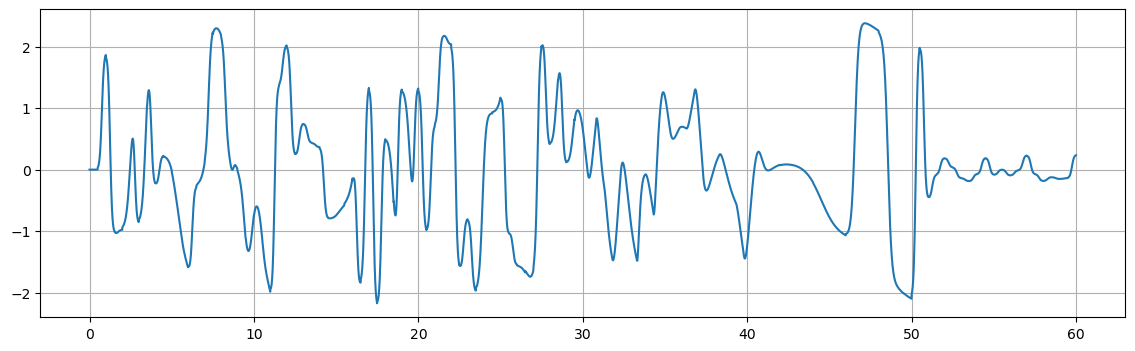

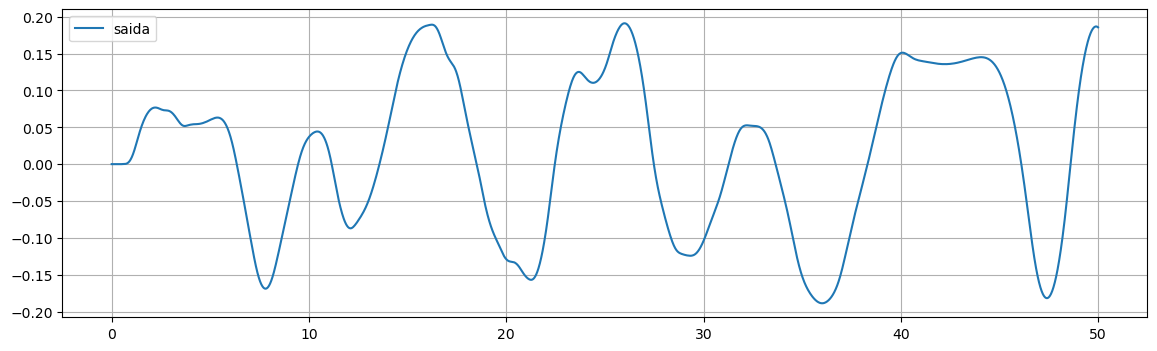

In [86]:
my_data = np.genfromtxt('data/ballBeamTeste1.csv', delimiter=',')[1:,:]
#my_data = np.genfromtxt('data/ballBeamRungeKutta_Est.csv', delimiter=',')[1:,:]
u = my_data[:, 0].copy()
y = my_data[:, 1].copy() 
t = my_data[:, 3].copy()

np.random.seed(15)
amplitude = 0.00001
#u += np.random.uniform(-0.0002, 0.0002, u.shape)
y = y + np.random.uniform(-amplitude, amplitude, y.shape)

dt = my_data[1, 3]
size = 5000
plt.figure(figsize=(14, 4))
plt.plot(t, u*(180/np.pi), label="entrada")
plt.grid()
plt.show()
plt.figure(figsize=(14, 4))
plt.plot(t[:size], y[:size], label="saida")
plt.legend()
plt.grid()
plt.show()

# Estimacao

[clip(Y1.1) clip(Y1.5) clip(Y1.3) U1.2] [ 1.08241973 -0.41748239  0.33506286  0.00207096] [1, 5, 3, 9]
Simulação livre
-------- [Y1.1, Y1.2, Y1.3, Y1.4, Y1.5, U1.1, U1.2, U1.3]

Simulação livre
RMSE: 0.013904256287593026 MSE: 0.0001933283429110702 
AET: 58.53547554049706 
MAPE: 0.23315%


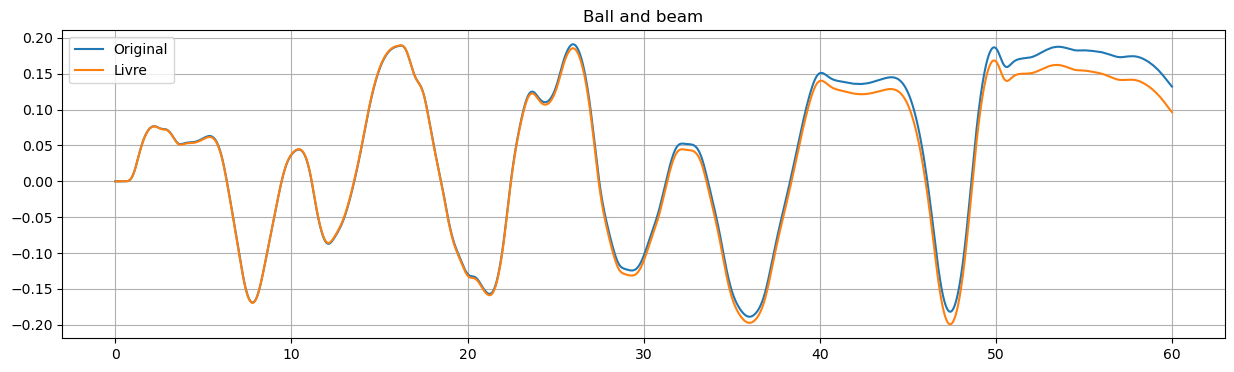

In [99]:
ui = np.reshape(u, (1, -1)).copy()
yi = np.reshape(my_data[:, 1], (1, -1)).copy()

amplitude = 0.00001
yi = yi + np.random.uniform(-amplitude, amplitude, yi.shape)

output = 0  
num = [6]
params = []
params.append({'nb':[5],'na':[3], 'level':1, 'nonlinear':[3,0,0,0,0], 'root':False, 'delay':1, 'diff':False, 'ymodifier':[1,0]})

sselector = structureSelector()
clip.setLimit(-0.2, 0.2)
ss = sselector.symbolic_regressors(**params[output], intg=False)

vCandidatos = sselector.matrix_candidate(ui, yi, **params[output], dt=dt, intg=False)

pad = max(max(params[output]['nb']), max(params[output]['na']))
psi, selected  = sselector.semp(vCandidatos.T, yi[output, pad:], num[output], 1e-13)

model = ss[selected]

theta = LSM(yi[output, pad:], psi)
print(model, theta, selected)

model = ss[selected]

slivre = sselector.predict(ui, yi, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], params[output]['diff'], dt=dt, intg=False)
print("\nSimulação livre")
metrics(yi, slivre)
'''
yhat = sselector.oneStepForward(ui, yi, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['diff'], dt=dt, intg=False)
print("\nUm passo a frente")
metrics(yi, yhat)'''

plt.figure(figsize=(15,4));plt.title("Ball and beam")
plt.plot(t, yi.T, label='Original');plt.plot(t, slivre, label='Livre')
plt.legend();plt.grid();plt.show()


## imagens

In [101]:
'''data = np.vstack((ui, yi, t)).T
#print(un.shape, s.shape, data.shape)
np.savetxt("data/ballBeamData.csv", data, delimiter=",", fmt="%.6f", header="input,output,time", comments="")'''

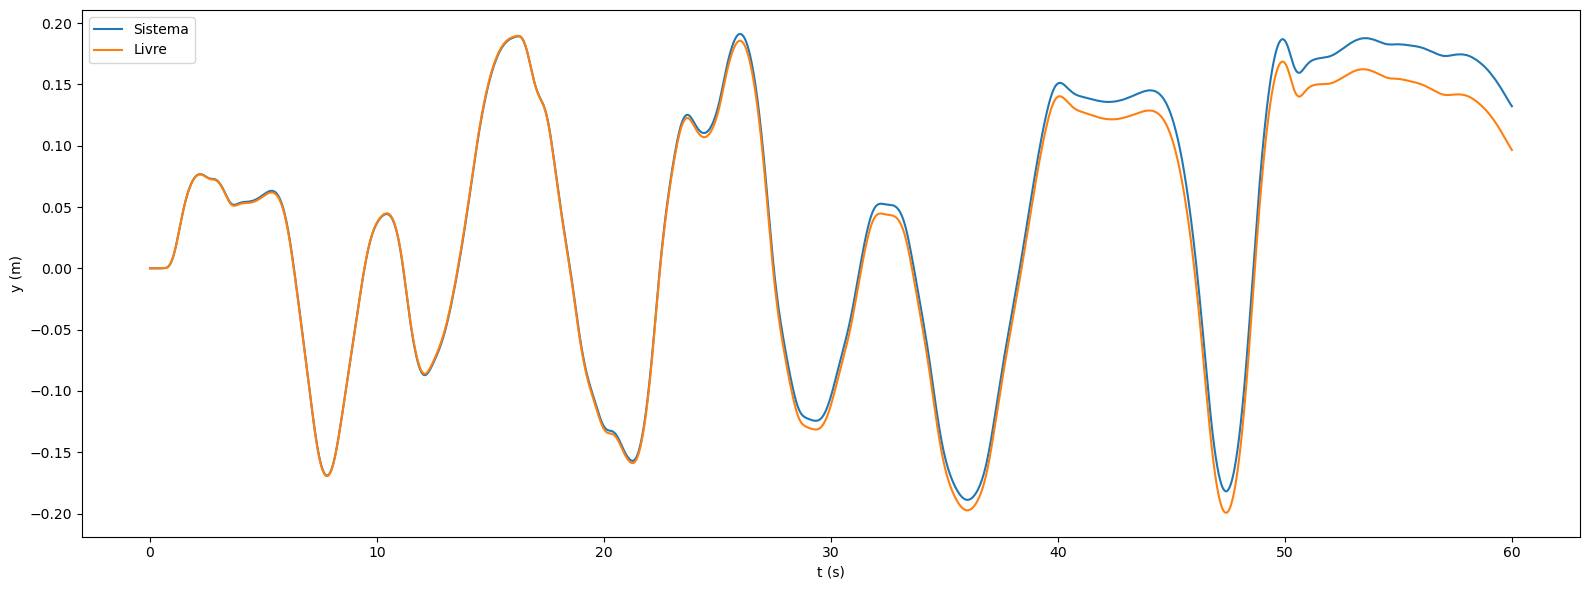

In [124]:
l = 1.5
plt.figure(figsize=(16, 6))
plt.plot(t, yi[output].T, label='Sistema', linewidth=l)
plt.plot(t, slivre, label='Livre', linewidth=l)
#plt.ylim((-0.2, 0.2))

plt.ylabel('y (m)')
plt.xlabel('t (s)')
plt.legend()
plt.tight_layout() 
plt.savefig('/home/jonhlucas/Downloads/periodo atual/TCC/escrita/Jonh - TCC/figuras/ballBeamEst.png')

plt.show()

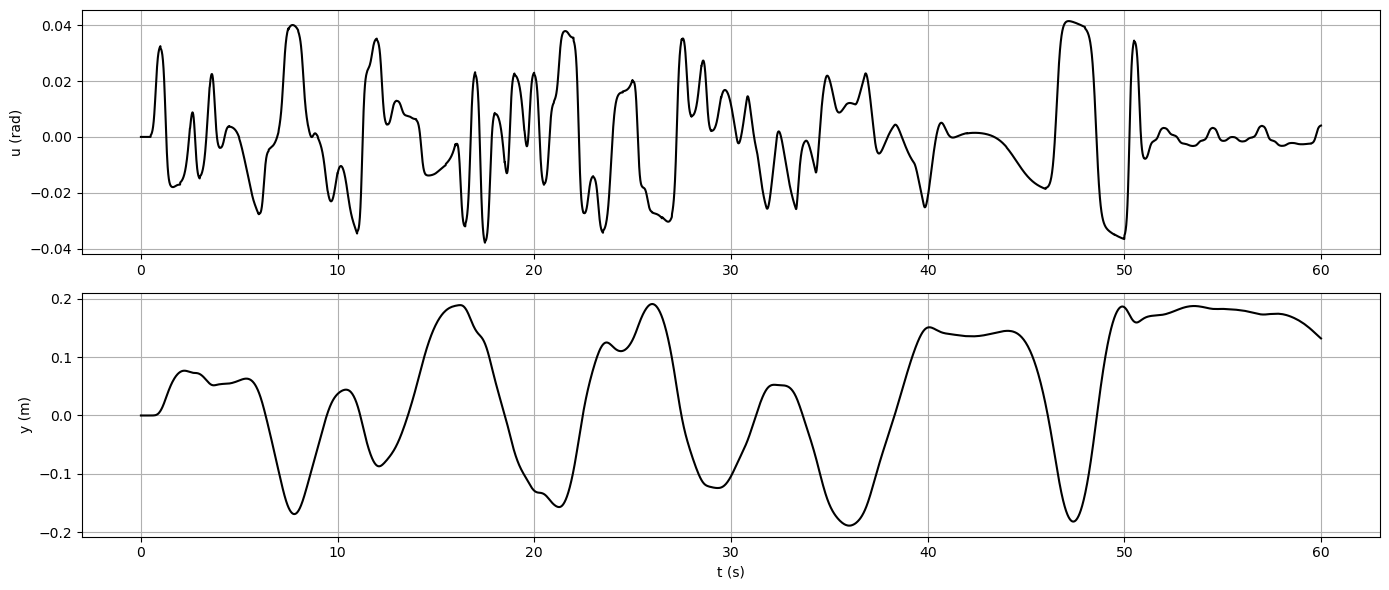

In [132]:
f, ax = plt.subplots(2, 1, figsize=[14, 6])
ax[0].plot(t, ui[0].T, label='Entrada', color='black')
ax[0].set_ylabel('u (rad)')

ax[1].plot(t, yi[0], label='Saída', color='black')
ax[1].set_ylabel('y (m)')
ax[1].set_xlabel('t (s)')


plt.tight_layout() 
plt.savefig('/home/jonhlucas/Downloads/periodo atual/TCC/escrita/Jonh - TCC/figuras/ballandbeamEst.png')
ax[0].grid()
ax[1].grid()
plt.show()

## antigo

[clip(Y1.1) sin(U1.1) clip(Y1.6) clip(Y1.3) U1.4] [ 0.95288552  0.00173203 -0.36473491  0.41184977  0.00103797] [1, 14, 6, 3, 12]
Simulação livre
-------- [Y1.1, Y1.2, Y1.3, Y1.4, Y1.5, Y1.6, U1.1, U1.2, U1.3, U1.4, U1.5]

Simulação livre
RMSE: 0.008027133786248676 MSE: 6.4434876822335e-05 
AET: 34.662154549117965 
MAPE: 0.12775%

Um passo a frente
RMSE: 8.72593729773751e-06 MSE: 7.61419817240466e-11 
AET: 0.04244633261821577 
MAPE: 0.02135%


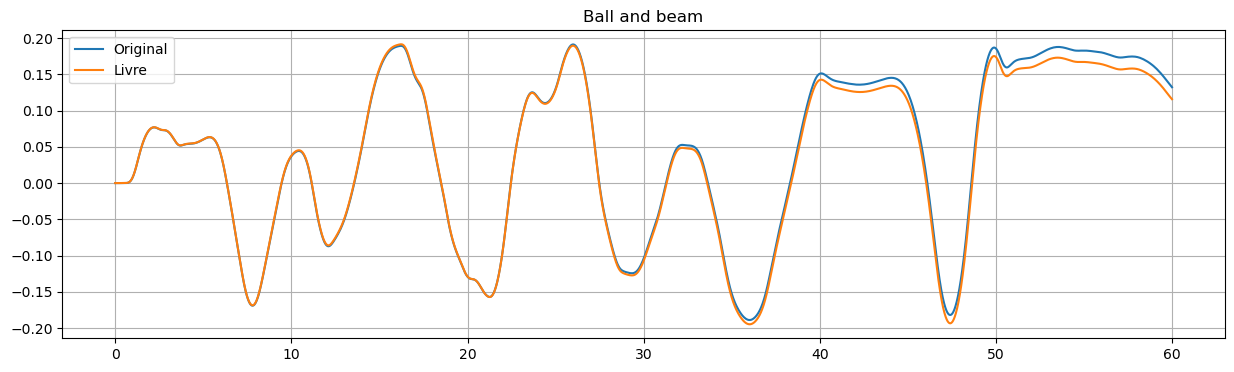

In [82]:
'''ui = np.reshape(u, (1, -1)).copy()
yi = np.reshape(my_data[:, 1], (1, -1)).copy()

amplitude = 0.00001
yi = yi + np.random.uniform(-amplitude, amplitude, yi.shape)

output = 0  
num = [6]
params = []
params.append({'nb':[6],'na':[5], 'level':1, 'nonlinear':[3,0,0,0,0], 'root':False, 'delay':1, 'diff':False, 'ymodifier':[1,0]})

sselector = structureSelector()
clip.setLimit(-0.2, 0.2)
ss = sselector.symbolic_regressors(**params[output], intg=False)

vCandidatos = sselector.matrix_candidate(ui, yi, **params[output], dt=dt, intg=False)

pad = max(max(params[output]['nb']), max(params[output]['na']))
psi, selected  = sselector.semp(vCandidatos.T, yi[output, pad:], num[output], 1e-13)

model = ss[selected]

theta = LSM(yi[output, pad:], psi)
print(model, theta, selected)

model = ss[selected]

slivre = sselector.predict(ui, yi, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], params[output]['diff'], dt=dt, intg=False)
print("\nSimulação livre")
metrics(yi, slivre)

yhat = sselector.oneStepForward(ui, yi, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['diff'], dt=dt, intg=False)
print("\nUm passo a frente")
metrics(yi, yhat)

plt.figure(figsize=(15,4));plt.title("Ball and beam")
plt.plot(t, yi.T, label='Original');plt.plot(t, slivre, label='Livre')
plt.legend();plt.grid();plt.show()
'''

# Validacao

## preparação

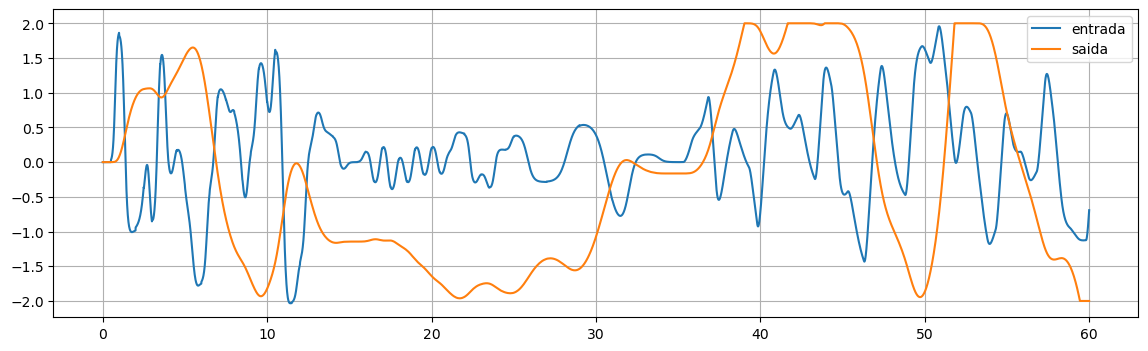

In [96]:

val_data = np.genfromtxt('data/ballBeamTesteVal.csv', delimiter=',')[1:,:]

uVal = np.reshape(val_data[:, 0], (1, -1))
yVal = np.reshape(val_data[:, 1], (1, -1))
yVal = yVal + np.random.uniform(-amplitude, amplitude, yVal.shape)

tVal = val_data[:, -1]
dt = val_data[1, -1]

plt.figure(figsize=(14, 4))
plt.plot(tVal, uVal.T*(180/np.pi), label="entrada")
plt.plot(tVal, yVal.T*10, label="saida")

plt.legend();plt.grid();plt.show()

## simul

Simulação livre
-------- [Y1.1, Y1.2, Y1.3, Y1.4, Y1.5, U1.1, U1.2, U1.3]

Simulação livre
RMSE: 0.0035869150526202202 MSE: 1.2865959594713516e-05 
AET: 16.023141842724456 
MAPE: 0.11166%

Um passo a frente
RMSE: 7.99738430515826e-05 MSE: 6.395815572439167e-09 
AET: 0.07184549400600967 
MAPE: 0.01776%


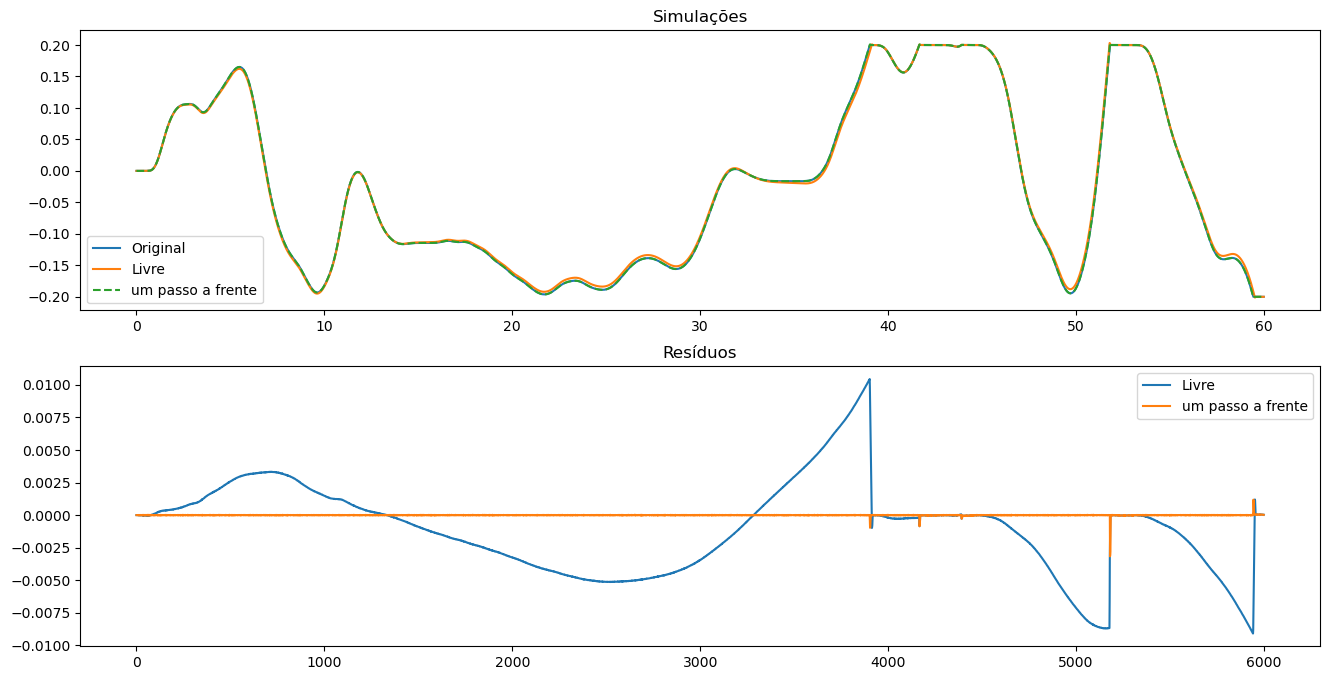

'\nSimulação livre\nRMSE: 0.005098985623454428 MSE: 2.5999654388194944e-05 \nAET: 17.15177680094702 \nMAPE: 0.18957%\n'

In [100]:
valLivre = sselector.predict(uVal, yVal, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], params[output]['diff'], dt=0.1)

print("\nSimulação livre")
metrics(yVal, valLivre)

hatVal = sselector.oneStepForward(uVal, yVal, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], dt=0.1)

print("\nUm passo a frente")
metrics(yVal, hatVal)

f, ax = plt.subplots(2,1, figsize=[16,8])

ax[0].plot(tVal, yVal[output].T, label='Original')
ax[0].plot(tVal, valLivre, label='Livre')
ax[0].plot(tVal, hatVal, '--', label='um passo a frente')
ax[0].set_title("Simulações");ax[0].legend()


ax[1].plot(yVal[output].T - valLivre, label='Livre')
ax[1].plot(yVal[output].T - hatVal, label='um passo a frente')
ax[1].set_title("Resíduos");ax[1].legend()
plt.show()

'''
Simulação livre
RMSE: 0.005098985623454428 MSE: 2.5999654388194944e-05 
AET: 17.15177680094702 
MAPE: 0.18957%
'''

In [103]:
'''data = np.vstack((uVal, yVal, tVal)).T
#print(un.shape, s.shape, data.shape)
np.savetxt("data/ballBeamDataVal.csv", data, delimiter=",", fmt="%.6f", header="input,output,time", comments="")'''

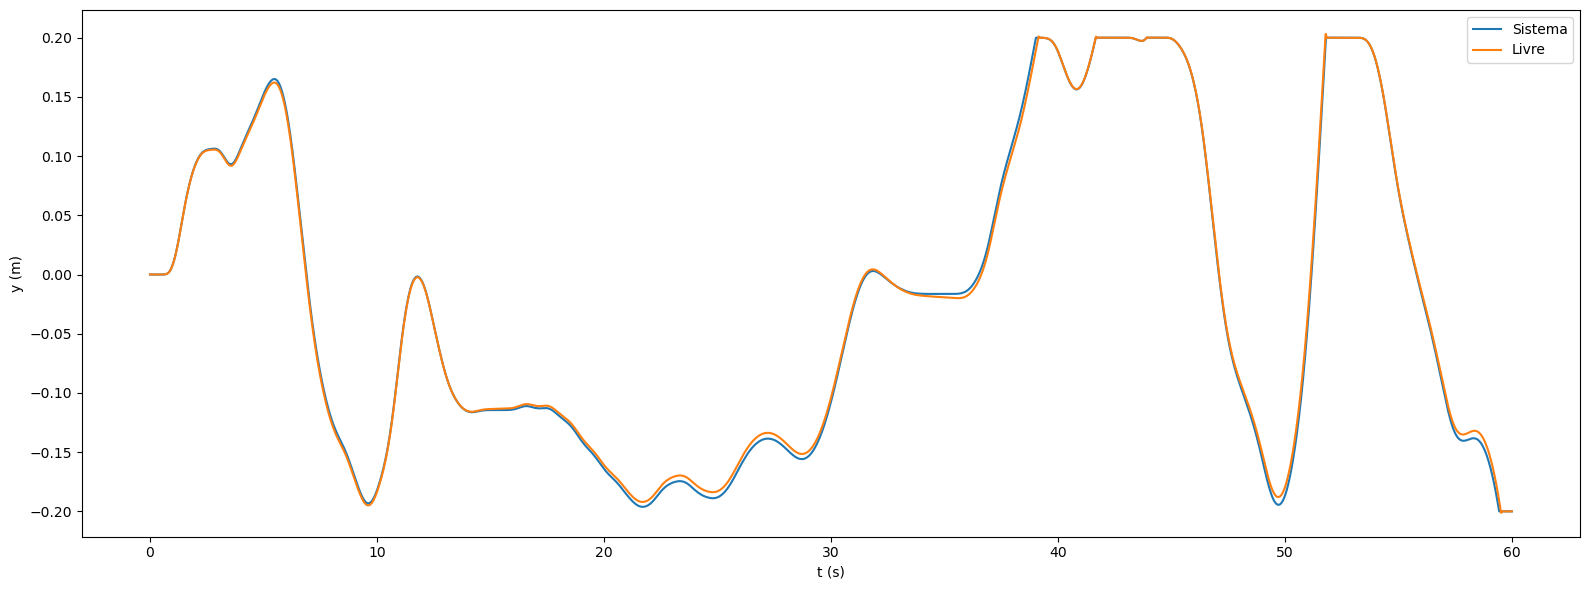

In [120]:
l = 1.5
plt.figure(figsize=(16, 6))
plt.plot(tVal, yVal[output].T, label='Sistema', linewidth=l)
plt.plot(tVal, valLivre, label='Livre', linewidth=l)
#plt.ylim((-0.2, 0.2))

plt.ylabel('y (m)')
plt.xlabel('t (s)')
plt.legend()
plt.tight_layout() 
#plt.savefig('/home/jonhlucas/Downloads/periodo atual/TCC/escrita/Jonh - TCC/figuras/ballBeamVal.png')

plt.show()

# Residuo

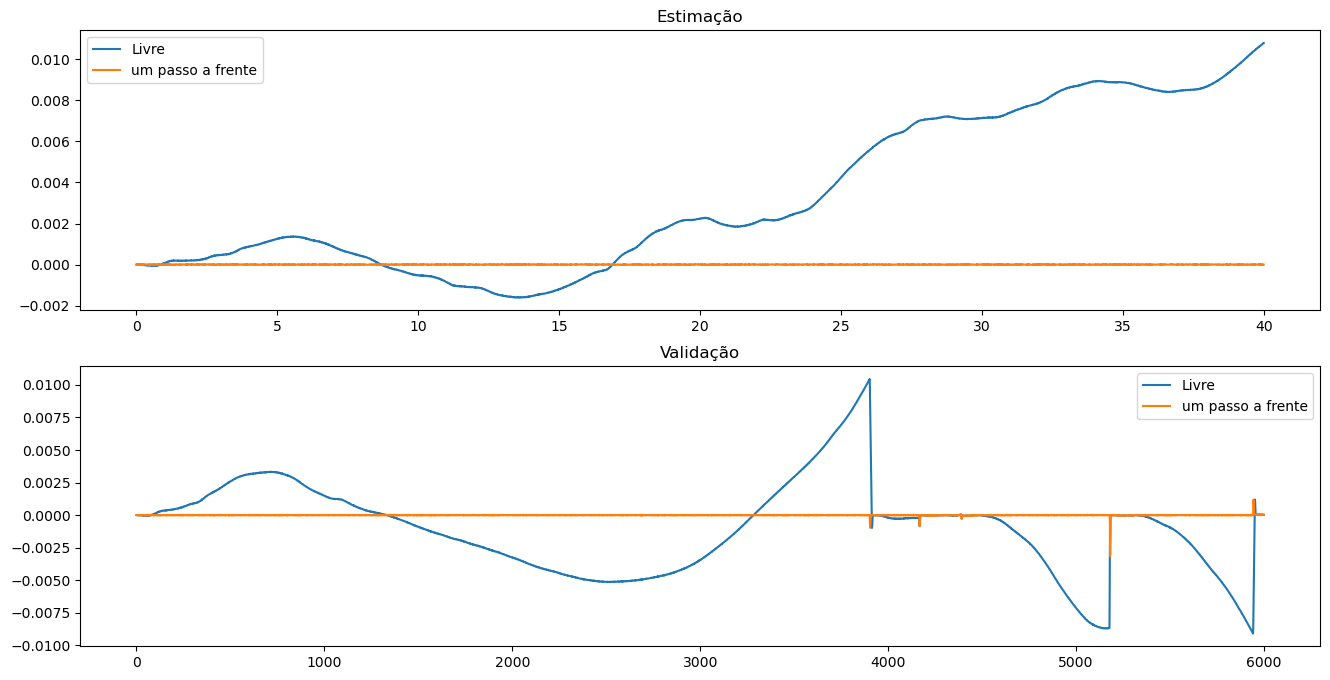

In [104]:
f, ax = plt.subplots(2,1, figsize=[16,8])

ax[0].plot(t[:4000], yi[output, :4000].T - slivre[:4000], label='Livre')
ax[0].plot(t[:4000], yi[output, :4000].T - yhat[:4000], label='um passo a frente')
ax[0].set_title("Estimação");ax[0].legend()


ax[1].plot(yVal[output].T - valLivre, label='Livre')
ax[1].plot((yVal[output].T - hatVal)[:], label='um passo a frente')
ax[1].set_title("Validação");ax[1].legend()
plt.show()

# Simple Narx

[Y1.1 U1.2 Y1.5 Y1.3 Y1.4] [ 1.08755554  0.00203727 -0.38131108  0.35581701 -0.06206126] [1, 6, 5, 3, 4]
Simulação livre
-------- [Y1.1, Y1.2, Y1.3, Y1.4, Y1.5, U1.1, U1.2, U1.3]

Simulação livre
RMSE: 0.013108014946037784 MSE: 0.00017182005582554993 
AET: 54.83248554083729 
MAPE: 1.08247%


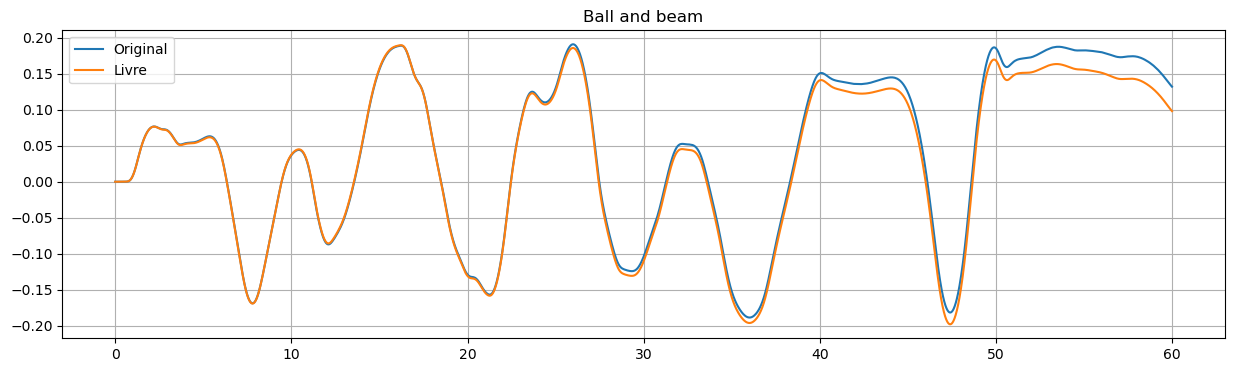

In [134]:

output = 0  
num = [6]
params = []
params.append({'nb':[5],'na':[3], 'level':1, 'nonlinear':[0,0,0,0,0], 'root':False, 'delay':1, 'diff':False, 'ymodifier':[0,0]})

sselector = structureSelector()
clip.setLimit(-0.2, 0.2)
ss = sselector.symbolic_regressors(**params[output], intg=False)

vCandidatos = sselector.matrix_candidate(ui, yi, **params[output], dt=dt, intg=False)

pad = max(max(params[output]['nb']), max(params[output]['na']))
psi, selected  = sselector.semp(vCandidatos.T, yi[output, pad:], num[output], 1e-13)

model = ss[selected]

theta = LSM(yi[output, pad:], psi)
print(model, theta, selected)

model = ss[selected]

slivre = sselector.predict(ui, yi, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], params[output]['diff'], dt=dt, intg=False)
print("\nSimulação livre")
metrics(yi, slivre)
'''
yhat = sselector.oneStepForward(ui, yi, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['diff'], dt=dt, intg=False)
print("\nUm passo a frente")
metrics(yi, yhat)'''

plt.figure(figsize=(15,4));plt.title("Ball and beam")
plt.plot(t, yi.T, label='Original');plt.plot(t, slivre, label='Livre')
plt.legend();plt.grid();plt.show()


Simulação livre
-------- [Y1.1, Y1.2, Y1.3, Y1.4, Y1.5, U1.1, U1.2, U1.3]

Simulação livre
RMSE: 2.7052281402951004 MSE: 7.318259291044488 
AET: 7388.609943086044 
MAPE: 0.39209%

Um passo a frente
RMSE: 7.921846522294219e-05 MSE: 6.2755652322785e-09 
AET: 0.07241508199893341 
MAPE: 0.03056%


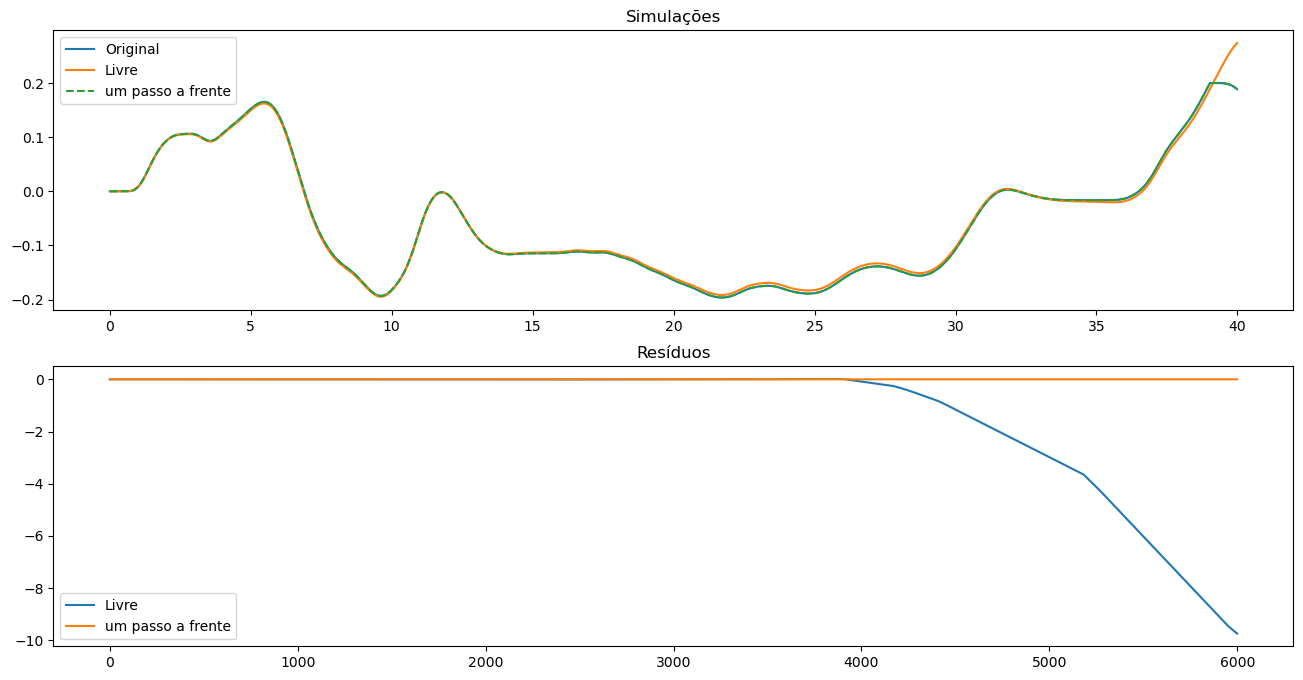

'\nSimulação livre\nRMSE: 0.005098985623454428 MSE: 2.5999654388194944e-05 \nAET: 17.15177680094702 \nMAPE: 0.18957%\n'

In [137]:
valLivre = sselector.predict(uVal, yVal, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], params[output]['diff'], dt=0.1)

print("\nSimulação livre")
metrics(yVal, valLivre)

hatVal = sselector.oneStepForward(uVal, yVal, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], dt=0.1)

print("\nUm passo a frente")
metrics(yVal, hatVal)

f, ax = plt.subplots(2,1, figsize=[16,8])

ax[0].plot(tVal[ :4000], yVal[output, :4000].T, label='Original')
ax[0].plot(tVal[ :4000], valLivre[ :4000], label='Livre')
ax[0].plot(tVal[ :4000], hatVal[ :4000], '--', label='um passo a frente')
ax[0].set_title("Simulações");ax[0].legend()


ax[1].plot(yVal[output].T - valLivre, label='Livre')
ax[1].plot(yVal[output].T - hatVal, label='um passo a frente')
ax[1].set_title("Resíduos");ax[1].legend()
plt.show()

'''
Simulação livre
RMSE: 0.005098985623454428 MSE: 2.5999654388194944e-05 
AET: 17.15177680094702 
MAPE: 0.18957%
'''